In [1]:
import pickle
import re
import numpy as np

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
import matplotlib
from matplotlib import pyplot as plt

In [4]:
from dataReader import *

/home/archit/anaconda3/lib/python3.7/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [5]:
with open('../data/processed/movies.pkl', 'rb') as movies_pkl:
    movies = pickle.load(movies_pkl)

In [6]:
yearDict = {}
for movie in movies:
    if movie.lang == 'en':
        num_female = len(movie.cast.get_female_cast())
        num_male = len(movie.cast.get_male_cast())
        if num_male == 0:
            if num_female > 0:
                ratio = 1.0
            else:
                ratio = 0.0
        else:
            ratio = float(num_female)/num_male
        if not isinstance(movie.date, str):
            continue
        year = movie.date[:4]
        if year in yearDict:
            yearDict[year] += [ratio]
        else:
            yearDict[year] = [ratio]
X = []
y = []
for year in yearDict:
    X.append([int(year)])
    y.append(np.mean(yearDict[year]))
X = np.array(X)
y = np.array(y)

AttributeError: 'Movie' object has no attribute 'date'

In [23]:
X

array([[1948],
       [1949],
       [1942],
       [1943],
       [1940],
       [1941],
       [1946],
       [1947],
       [1944],
       [1945],
       [2018],
       [2015],
       [2014],
       [2017],
       [2016],
       [2011],
       [2010],
       [2013],
       [2012],
       [1955],
       [1954],
       [1957],
       [1956],
       [1951],
       [1950],
       [1953],
       [1952],
       [1959],
       [1958],
       [1920],
       [1921],
       [1922],
       [1923],
       [1924],
       [1925],
       [1926],
       [1927],
       [1928],
       [1929],
       [1878],
       [1933],
       [1932],
       [1931],
       [1930],
       [1937],
       [1936],
       [1935],
       [1934],
       [1939],
       [1938],
       [1908],
       [1909],
       [1906],
       [1907],
       [1904],
       [1905],
       [1902],
       [1903],
       [1900],
       [1901],
       [1986],
       [1987],
       [1984],
       [1985],
       [1982],
       [1983],
       [19

In [24]:
y

array([0.55949256, 0.42832705, 0.4783545 , 0.59225097, 0.29239503,
       0.50699229, 0.56638287, 0.54132205, 0.63810807, 0.55308812,
       0.37333333, 0.61626984, 0.59947443, 0.68200885, 0.68592109,
       0.60546383, 0.61025445, 0.60416042, 0.5375566 , 0.45275951,
       0.51914235, 0.4822365 , 0.43752217, 0.46436838, 0.61812758,
       0.42893177, 0.47512155, 0.45895492, 0.48938038, 0.43731884,
       0.29397759, 0.35393773, 0.51391895, 0.44020147, 0.62346561,
       0.38335313, 0.59186766, 0.46411452, 0.5899433 , 1.        ,
       0.50930047, 0.47957015, 0.62003804, 0.70872434, 0.44203954,
       0.47256892, 0.49210001, 0.63296257, 0.54920992, 0.46376838,
       0.        , 0.33333333, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.55920558, 0.53940219, 0.50815017, 0.5272701 , 0.53538973,
       0.48604316, 0.5215658 , 0.5443399 , 0.56115514, 0.53657076,
       0.53921569, 0.71666667, 1.625     , 0.6       , 0.375  

In [25]:
reg = LinearRegression().fit(X, y)

In [26]:
reg.score(X, y)

0.26196316934962416

In [27]:
reg.coef_

array([0.00310923])

In [28]:
reg.intercept_ 

-5.610807152820308

In [35]:
y_pred = reg.predict(X)

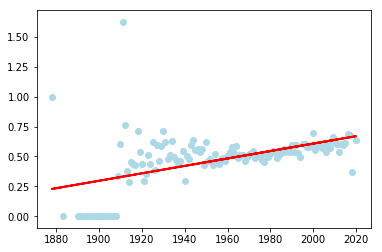

In [46]:
plt.scatter(X,y,color='lightblue')
plt.plot(X,y_pred,color='red', linewidth=2)

In [47]:
reg.predict(np.array([[2020]]))

array([0.6698437])

In [48]:
reg.predict(np.array([[2030]]))

array([0.70093603])

In [49]:
reg.predict(np.array([[2040]]))

array([0.73202836])

In [50]:
reg.predict(np.array([[2050]]))

array([0.76312069])